In [19]:
"""Script that runs the tutorial for A adsorption and desorption.
 
"""
import numpy as np
#from ase.build import fcc100
from user_sites import Site
from user_system import System
from user_kmc import NeighborKMC
from user_events import (O2CAdsEvent, VO2CAdsEvent, H2AdsEvent, O3CAdsEvent, HO2CAdsEvent, Ti5CAdsEvent,O2CDesEvent, VO2CDesEvent, H2DesEvent, O3CDesEvent, HO2CDesEvent, Ti5CDesEvent )
from ase import *
from ase.io import *
#from ase.visualize import view



import sys
from ase import Atoms
import ase.units as au
from ase.build import molecule
import ase.thermochemistry as tchem

import mkm

import numpy as np
from numpy import pi, exp, log
from scipy.integrate import ode
import matplotlib.pyplot as m

h_planck = au._hplanck*au.J*au.s
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
########CONSTANTS#####################################################
######################################################################
######################################################################














A = 6.684 * 3.005
p_H2 = 1e-5 * au.bar

p_H2O = 1e-8 * p_H2 # #20 bar, 200: 1 bar, 400: 1 Pa 265   #### changed 0405 aenm SI


p_H = 0.7/100.0 * p_H2 # 
p_Pa = p_H2/au.bar*1e5

T = 518.15

A1 = 1.5

A2 = 11.8









Vibrational energy of H2 0.0003128537485559697 ZPE 0.27282735822131243
rotational 0.04793061308672932
activation energy 0.8200000000000001 $\mu$ -1.1439069226820633
adsorption rate limits reaction 2:  0.00017315358096431656 8.538173378371542e-07
desorption rate limits reaction 2:  223586697876.58362 1102502172.3121383
Vibrational energy of H 0
activation energy 0.08 $\mu$ -1.1549415109999965
adsorption rate limits reaction 3:  2.0176980536896094 10.51086586395655
desorption rate limits reaction 3:  1.577178840424957e-05 8.216053539261352e-05
Eyring fwd bwd 1799548477742.1936 8.216053539243714e-05
Vibrational energy of H 0
activation energy 0.08 $\mu$ -1.247039575952862
adsorption rate limits reaction 0:  15.872558022358266 1.33612701660465
desorption rate limits reaction 0:  1.170696729936815e-13 9.8547412894377e-15
activation energy 0.12 $\mu$ -1.247039575952862
adsorption rate limits reaction 4:  6.4801848220525935 0.5454917853278373
desorption rate limits reaction 4:  334.0675274931

'\n###stype defined:\nvo2c == -1\no2c == 0\no3c == 1\nti5c == 2\nti6c == 3\n'

In [20]:
from ase.visualize import view


def run_test():
    """Runs the test of A adsorption and desorption over a surface.

    First, constants are defined and old output files cleared.
    Next, the sites, events, system and simulation objects
    are loaded, and the simulation is performed.

    Last, the results are read in from the generated.txt files,
    and plotted using matplotlib.

    """
    tend = 4.0 # seconds
    np.savetxt("time.txt", [])
    np.savetxt("coverages.txt", [])

    



    sys2 = read('CONTCAR_243')
    #view(sys2)
    sys = sys2
    #print(sys.positions[0][3])
    del sys[[atom.index for atom in sys if sys.positions[atom.index][2] < 24]]
    view(sys)
    Ti5c_list = [32, 35, 24, 30, 37, 34, 26, 28]
    Ti6c_list = [31, 36, 38, 29, 39, 33, 27, 25]

    a_list = sys.get_chemical_symbols()
    print(len(a_list))
    Ti_list = [n for n in range(len(a_list)) if a_list[n]=='Ti' ]
    O_list = [n for n in range(len(a_list)) if a_list[n]=='O' ]

    O2c_list = []
    O3c_list = []
    for ind in O_list:
        if sys.positions[ind][2]> 24.8:
            O2c_list.append(ind)
        elif sys.positions[ind][2]< 24.8:
            O3c_list.append(ind)

    print('o2c', O2c_list, 'o3c', O3c_list)
    sites = []
    for i in range(len(a_list)):
        if i in O2c_list:
            s = 0
        elif i in O3c_list:
            s = 1
        elif i in Ti5c_list:
            s = 2
        else:
            s = 3
        sites.append(Site(stype = s, covered = 0, ind = i))
    p = System(atoms= sys, sites = sites)
    p.set_neighbors(Ncutoff = 2, pbc = False)
    #view(sys)








    # Set the global neighborlist based on distances:

    events = [O2CAdsEvent, VO2CAdsEvent, H2AdsEvent, O3CAdsEvent, HO2CAdsEvent, Ti5CAdsEvent, O2CDesEvent, VO2CDesEvent, H2DesEvent, O3CDesEvent, HO2CDesEvent, Ti5CDesEvent]
    reverse_events = {0:6, 1:7, 2:8, 3:9, 4:10, 5:11}
#    parameters = {"pH2": pCO, "pO2": pO2, "T": T,
    parameters = { "Name": "Primitive Simulation", 'A': A, 'A1': A1, 'A2': A2,'p_H2':p_H2, 'p_H2O': p_H2O, 'p_H': p_H, 'T': T, 'Events': events, "reverses ": reverse_events}

    # Instantiate simulator object.
    sim = NeighborKMC(system=p, tend= tend,
                      parameters=parameters,
                      events=events, rev_events = reverse_events)

    # Run the simulation.
    sim.run_kmc()
    print("Simulation end time reached ! ! !")

if __name__ == '__main__':
    run_test()


40
o2c [0, 6, 8, 10, 13, 16, 21, 22] o3c [1, 2, 3, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19, 20, 23]
-------------------------------------------------- 
 MonteCoffee Simulation Initialized 
 -------------------------------------------------- 

kMC simulation loading ...
Initializing First Reaction method lists ...
Scaling based on the function: scale_rate_constant
Loading logging and counters...

Running simulation.
Time :  0.008276556809651938 	 Covs : [0.95, 0.05, 0.0]
Time :  0.013196874970554329 	 Covs : [0.925, 0.075, 0.0]
Time :  0.017306894664055154 	 Covs : [0.9, 0.1, 0.0]
Time :  0.021888970791811846 	 Covs : [0.875, 0.125, 0.0]
Time :  0.022324711271844565 	 Covs : [0.85, 0.15, 0.0]
Time :  0.028262312583967223 	 Covs : [0.825, 0.175, 0.0]
Time :  0.03203401082521564 	 Covs : [0.8, 0.2, 0.0]
Time :  0.04591345625904386 	 Covs : [0.8, 0.175, 0.025]
Time :  0.0459153677001986 	 Covs : [0.825, 0.175, 0.0]
Time :  0.04668035134241264 	 Covs : [0.8, 0.2, 0.0]
Time :  0.0472309245776

45 45 45
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 1. 1. 1. 

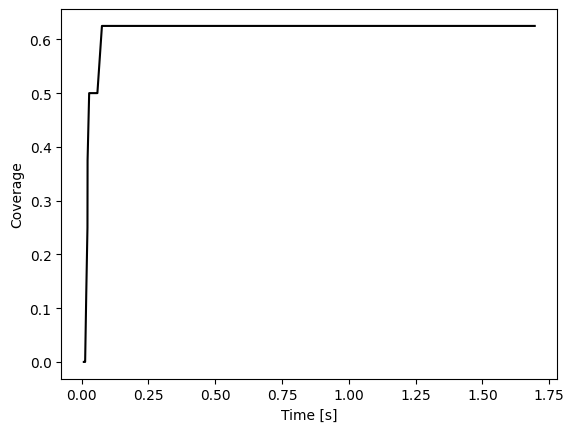

In [21]:
import matplotlib.pyplot as plt
time = np.loadtxt('time.txt')
cov_A = np.loadtxt('coverages.txt')
print(len(time), len(cov_A), len(cov_A[:,1]))
sum = 0*time
Ti5c_list = [32, 35, 24, 30, 37, 34, 26, 28]
for ind in Ti5c_list:
    sum += cov_A[:, ind]
    print(cov_A[:,ind])
plt.plot(time[:-1], sum[:-1]/len(Ti5c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_Ti5c.pdf')

45 45 45 40
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 

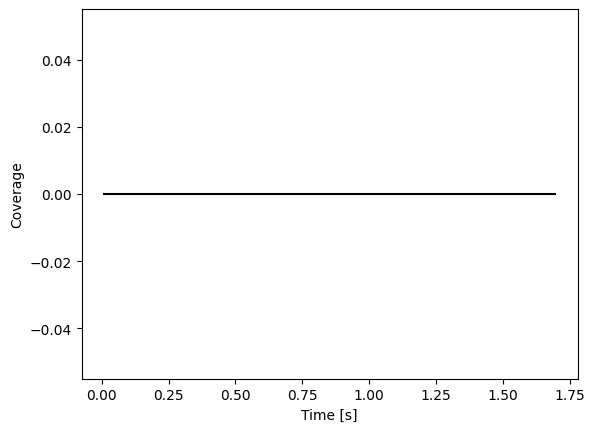

In [22]:

print(len(time), len(cov_A), len(cov_A[:,1]), len(cov_A[1,:]))
sum = 0*time
Ti6c_list = [31, 36, 38, 29, 39, 33, 27, 25]
for ind in Ti6c_list:
    sum += cov_A[:, ind]
    print(cov_A[:,ind])
plt.plot(time[:-1], sum[:-1]/len(Ti6c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_Ti6c.pdf')


45 45 45
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 

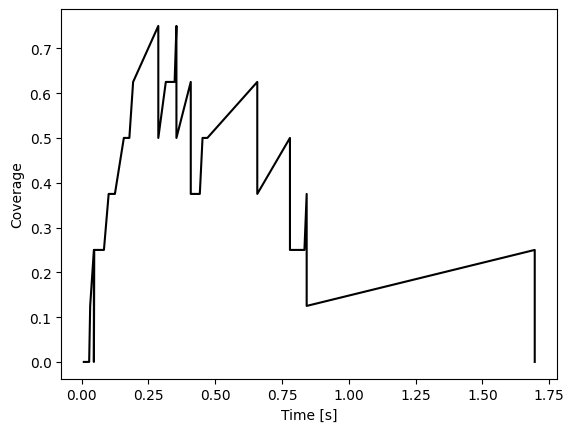

In [23]:
O2c_list = [0, 6, 8, 10, 13, 16, 21, 22]

print(len(time), len(cov_A), len(cov_A[:,1]))
sum = 0

for ind in O2c_list:
    sum += cov_A[:, ind]
    print(cov_A[:,ind])
plt.plot(time[:-1], sum[:-1]/len(O2c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_O2c.pdf')

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

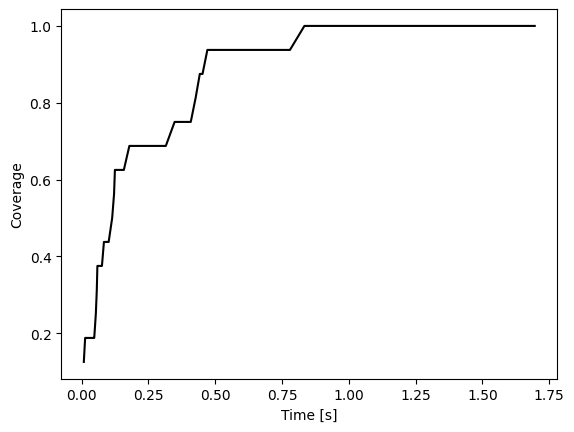

In [24]:
O3c_list = [1, 2, 3, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19, 20, 23]

sum = 0

for ind in O3c_list:
    sum += cov_A[:, ind]
    print(cov_A[:, ind])
plt.plot(time[:-1], sum[:-1]/len(O3c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_O3c.pdf')

In [25]:
import h5py
with h5py.File('detail_site_event_evol.hdf5','a') as f2:
    time_list = np.array(f2["time"])
    event_list = np.array(f2["event"])
    site_list = np.array(f2["site"])
    othersite_list = np.array(f2["othersite"])

    

In [26]:
print(time_list)
print(event_list)
print( site_list)
print(othersite_list)
print(len(time_list), len(event_list), len(site_list))


[0.00000000e+00 7.77122107e-03 8.27655681e-03 1.31968750e-02
 1.73068947e-02 2.18889708e-02 2.23247113e-02 2.82623126e-02
 3.20340108e-02 4.59134563e-02 4.59153677e-02 4.66803513e-02
 4.72309246e-02 5.32226179e-02 5.68210977e-02 5.90330670e-02
 7.60604947e-02 8.35276654e-02 1.01222573e-01 1.14383016e-01
 1.21418401e-01 1.24606121e-01 1.58015837e-01 1.78675854e-01
 1.92758967e-01 2.87003199e-01 2.87003425e-01 3.15078102e-01
 3.48006435e-01 3.54812252e-01 3.54812355e-01 4.08428417e-01
 4.08430121e-01 4.26608902e-01 4.42275946e-01 4.52487681e-01
 4.70567572e-01 6.57338733e-01 6.57339029e-01 7.79602500e-01
 7.79605613e-01 8.33747929e-01 8.42139728e-01 8.42140463e-01
 1.69553319e+00 1.69553333e+00 6.21255568e+01]
[ 0  3  3  3  5  5  5  5  0  4  7  0  0  3  3  3  5  3  0  3  3  3  0  3
  0  4  7  0  3  4  7  4  7  3  3  0  3  4  7  4  7  3  4  7  4  7 11]
[ 0  7 20  1 30 28 34 35 13 13 13  0 10  3 17 23 37  2  8 14  4 15  6 11
 22  0  0 16 19  8  8  6  6  5 18 21 12 16 16 21 21  9 22 22 10 1

In [27]:
#O2CAdsEvent, VO2CAdsEvent, H2AdsEvent, O3CAdsEvent, HO2CAdsEvent, Ti5CAdsEvent,
#O2CDesEvent, VO2CDesEvent, H2DesEvent, O3CDesEvent, HO2CDesEvent, Ti5CDesEvent
#o2c [0, 6, 8, 10, 13, 16, 21, 22] o3c [1, 2, 3, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19, 20, 23]

coverage = np.zeros((len(time_list), 40))
for ind in range(len(time_list)):
    event = event_list[ind]
    if event == 0 and coverage[ind, site_list[ind]] == 0:
        coverage[ind:-1, site_list[ind]] = +1
    elif event ==1 and coverage[ind, site_list[ind]] == 0:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] +2
    elif event == 2 and coverage[ind, site_list[ind]] == 0:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] +1
        coverage[ind:-1, othersite_list[ind]] =  1.0*coverage[ind, othersite_list[ind]] +1
    elif event == 3 and coverage[ind, site_list[ind]] == 0:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] +1
    elif event == 4 and coverage[ind, site_list[ind]] == 1:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] +1
    elif event == 5 and coverage[ind, site_list[ind]] == 0:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] +1
    elif event == 6 and coverage[ind, site_list[ind]] == 1:
        coverage[ind:-1, site_list[ind]] = 1.0*coverage[ind, site_list[ind]] -1
    elif event == 7 and coverage[ind, site_list[ind]] == 2:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] -2
    elif event == 8 and coverage[ind, site_list[ind]] == 1:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] -1
        coverage[ind:-1, othersite_list[ind]] =  1.0*coverage[ind, othersite_list[ind]] -1
    elif event == 9 and coverage[ind, site_list[ind]] == 1:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] -1
    elif event == 10 and coverage[ind, site_list[ind]] == 2:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] -1
    elif event == 11 and coverage[ind, site_list[ind]] == 1:
        coverage[ind:-1, site_list[ind]] =  1.0*coverage[ind, site_list[ind]] -1
    print(event, site_list[ind])
print(coverage[:,36])
        

0 0
3 7
3 20
3 1
5 30
5 28
5 34
5 35
0 13
4 13
7 13
0 0
0 10
3 3
3 17
3 23
5 37
3 2
0 8
3 14
3 4
3 15
0 6
3 11
0 22
4 0
7 0
0 16
3 19
4 8
7 8
4 6
7 6
3 5
3 18
0 21
3 12
4 16
7 16
4 21
7 21
3 9
4 22
7 22
4 10
7 10
11 28
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
0*time_list

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.

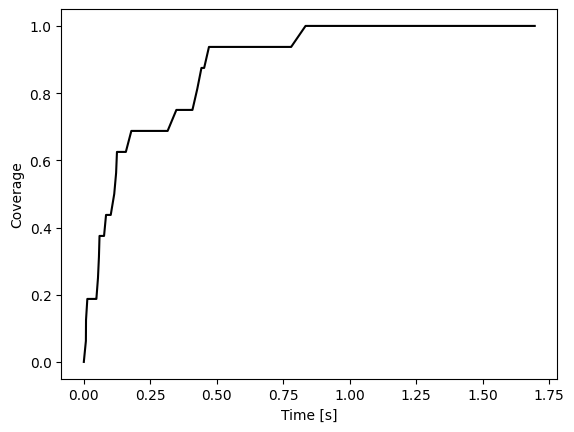

In [29]:
import matplotlib.pyplot as plt
O3c_list = [1, 2, 3, 4, 5, 7, 9, 11, 12, 14, 15, 17, 18, 19, 20, 23]
sum = 0*time_list

for ind in O3c_list:
    sum += coverage[:, ind]
    print(coverage[:, ind])
plt.plot(time_list[:-1], sum[:-1]/len(O3c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_O3c.pdf')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.

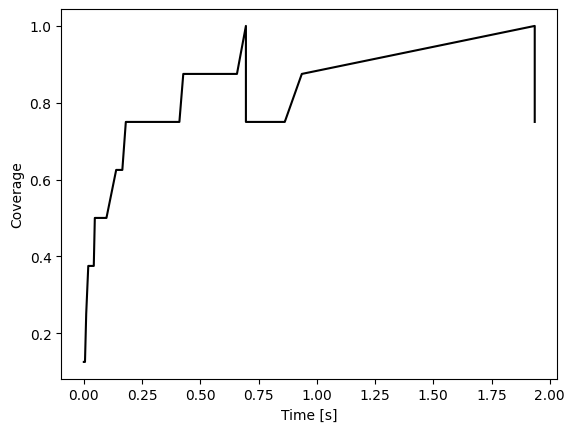

In [16]:
O2c_list = [0, 6, 8, 10, 13, 16, 21, 22]

sum = 0*time_list

for ind in range(len(O2c_list)):
    sum += coverage[:, ind]
    print(coverage[:,ind])
plt.plot(time_list[:-1], sum[:-1]/len(O2c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_O2c.pdf')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.

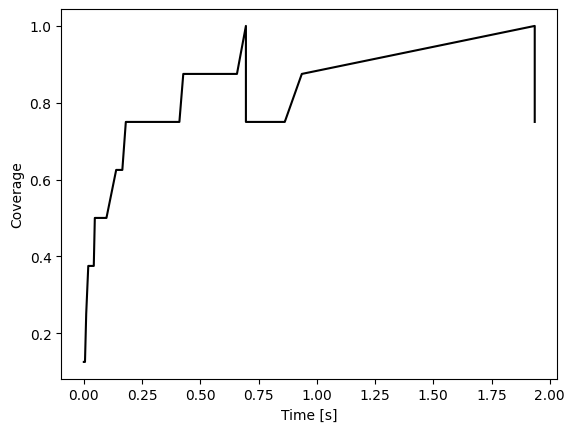

In [17]:
sum = 0*time_list
Ti6c_list = [31, 36, 38, 29, 39, 33, 27, 25]
for ind in range(len(Ti6c_list)):
    sum += coverage[:, ind]
    print(coverage[:,ind])
plt.plot(time_list[:-1], sum[:-1]/len(Ti6c_list), '-k')
plt.xlabel("Time [s]")
plt.ylabel("Coverage")
plt.savefig('coverage_Ti6c.pdf')
